### __EDA And Feature Engineering Of Google Play Store Dataset__

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Reading the dataset
data = pd.read_csv(r"data_sets\googleplaystore.csv")

In [61]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
data.shape

(10841, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [64]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

__insights__ :  
- 10841 samples and 13 features
- null values present
- all values are 'object' type (except one) (to give it to ML algorithm we convert it into nums)


In [65]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


#### ___Handling "Reviews"___

In [66]:
print(f'Total null values: {data['Reviews'].isna().sum()}')
print(f'dtype: {data['Reviews'].dtype}')

Total null values: 0
dtype: object


In [67]:
# Convert dtype into int

# data['Reviews'].map(int)   #This will give an error
data[~ data['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [68]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [69]:
# Notice that, the whole data in sample is misaligned with dataset.... Hence Drop It
data.drop(data[data['Reviews'] == '3.0M'].index,inplace=True,axis=0)

In [70]:
# Convert 'Reviews' dtype into 'int'
data['Reviews'].map(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

#### ___Handling "size" feature___

In [71]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [72]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [73]:
data['Size'].isnull().sum()  # No null values

np.int64(0)

In [74]:
# Convert M(megabytes) and K(kilobytes) as numbers in M  
# 1M = 1000k
# 1K = 0.001M

# But when you convert the acutal values (see next cell), "varies with device" is sample that cause problem

In [75]:
def handle_Size(size_feature):
    if "M" in size_feature:
        return float(size_feature.replace("M",""))
    elif "k" in size_feature:
        return float(size_feature.replace("k",""))/1000
    else:
        return np.nan
    
data['Size']=data['Size'].map(handle_Size)

In [76]:
data['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [77]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### ___Handling "Installs" and "Price"___

In [78]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [79]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [80]:
obj_to_remove = ['+',"$",',']

for i in obj_to_remove:
    for cols in ['Price','Installs']:
        data[cols]=data[cols].str.replace(i,"")


In [81]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [82]:
data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [83]:
data[['Price','Installs']]

,Price,Installs
0,0,10000
1,0,500000
2,0,5000000
3,0,50000000
4,0,100000
...,...,...
10836,0,5000
10837,0,100
10838,0,1000
10839,0,1000


In [84]:
data[['Price','Installs']]=data[['Price','Installs']].astype(float)

In [85]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### ___Handling "Last Updated" feature___

In [86]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [87]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated (year)'] = data['Last Updated'].dt.year
data['Last Updated (month)'] = data['Last Updated'].dt.month
data['Last Updated (day)'] = data['Last Updated'].dt.day

In [88]:
data[['Last Updated','Last Updated (year)','Last Updated (month)','Last Updated (day)']].head()

,Last Updated,Last Updated (year),Last Updated (month),Last Updated (day)
0,2018-01-07,2018,1,7
1,2018-01-15,2018,1,15
2,2018-08-01,2018,8,1
3,2018-06-08,2018,6,8
4,2018-06-20,2018,6,20


In [89]:
data.drop('Last Updated',axis=1,inplace=True)

#### ___Handling "Reviews"___

In [90]:
data['Reviews']=data['Reviews'].map(int)

In [91]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated (year),Last Updated (month),Last Updated (day)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,1,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018,8,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018,6,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018,6,20


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10840 non-null  object 
 1   Category              10840 non-null  object 
 2   Rating                9366 non-null   float64
 3   Reviews               10840 non-null  int64  
 4   Size                  9145 non-null   float64
 5   Installs              10840 non-null  float64
 6   Type                  10839 non-null  object 
 7   Price                 10840 non-null  float64
 8   Content Rating        10840 non-null  object 
 9   Genres                10840 non-null  object 
 10  Current Ver           10832 non-null  object 
 11  Android Ver           10838 non-null  object 
 12  Last Updated (year)   10840 non-null  int32  
 13  Last Updated (month)  10840 non-null  int32  
 14  Last Updated (day)    10840 non-null  int32  
dtypes: float64(4), int32(3),

## ~~Data Cleaning is done~~

In [93]:
# Copy cleaned data into a csv file
data.to_csv("data_sets/cleaned_googleplaystore.csv") 

In [94]:
# Performing EDA
data_copy = data

In [95]:
data_copy.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated (year),Last Updated (month),Last Updated (day)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018,1,7


In [96]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10840 non-null  object 
 1   Category              10840 non-null  object 
 2   Rating                9366 non-null   float64
 3   Reviews               10840 non-null  int64  
 4   Size                  9145 non-null   float64
 5   Installs              10840 non-null  float64
 6   Type                  10839 non-null  object 
 7   Price                 10840 non-null  float64
 8   Content Rating        10840 non-null  object 
 9   Genres                10840 non-null  object 
 10  Current Ver           10832 non-null  object 
 11  Android Ver           10838 non-null  object 
 12  Last Updated (year)   10840 non-null  int32  
 13  Last Updated (month)  10840 non-null  int32  
 14  Last Updated (day)    10840 non-null  int32  
dtypes: float64(4), int32(3),

In [97]:
# Check duplicates
data_copy.duplicated('App',keep='first').sum()

np.int64(1181)

1181 duplicates, remove them

In [98]:
data_copy = data_copy.drop_duplicates('App',keep='first')

In [99]:
data_copy.duplicated('App').sum()

np.int64(0)

In [100]:
# Getting numeric and categorical cols
numeric_cols = [cols for cols in data_copy.columns if data_copy[cols].dtype!='O']
categorical_cols = [cols for cols in data_copy.columns if data_copy[cols].dtype == 'O']

print(f"numeric cols are :{len(numeric_cols)},[{numeric_cols}]")
print(f"categorical cols are :{len(categorical_cols)},[{categorical_cols}]")


numeric cols are :8,[['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated (year)', 'Last Updated (month)', 'Last Updated (day)']]
categorical cols are :7,[['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']]


In [101]:
data_copy['Reviews'].value_counts()

Reviews
0         593
1         272
2         213
3         170
4         137
         ... 
885         1
88486       1
603         1
1195        1
398307      1
Name: count, Length: 5330, dtype: int64

In [102]:
# To get how many times a category is occuring in a feature
for col in categorical_cols:
    print(data_copy[col].value_counts())
    print("-------------------------------")

App
iHoroscope - 2018 Daily Horoscope & Astrology         1
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
                                                     ..
Learn To Draw Kawaii Characters                       1
3D Color Pixel by Number - Sandbox Art Coloring       1
Mandala Coloring Book                                 1
Tattoo Name On My Photo Editor                        1
Name Art Photo Editor - Focus n Filters               1
Name: count, Length: 9659, dtype: int64
-------------------------------
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION      

In [103]:
# To get %age of it, we do (Normalize=True)*100

for col in categorical_cols:
    print(data_copy[col].value_counts(normalize=True)*100)
    print("-------------------------------")

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
-------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY     

observation for example:  
92.2% apps are free and 7.8% paid

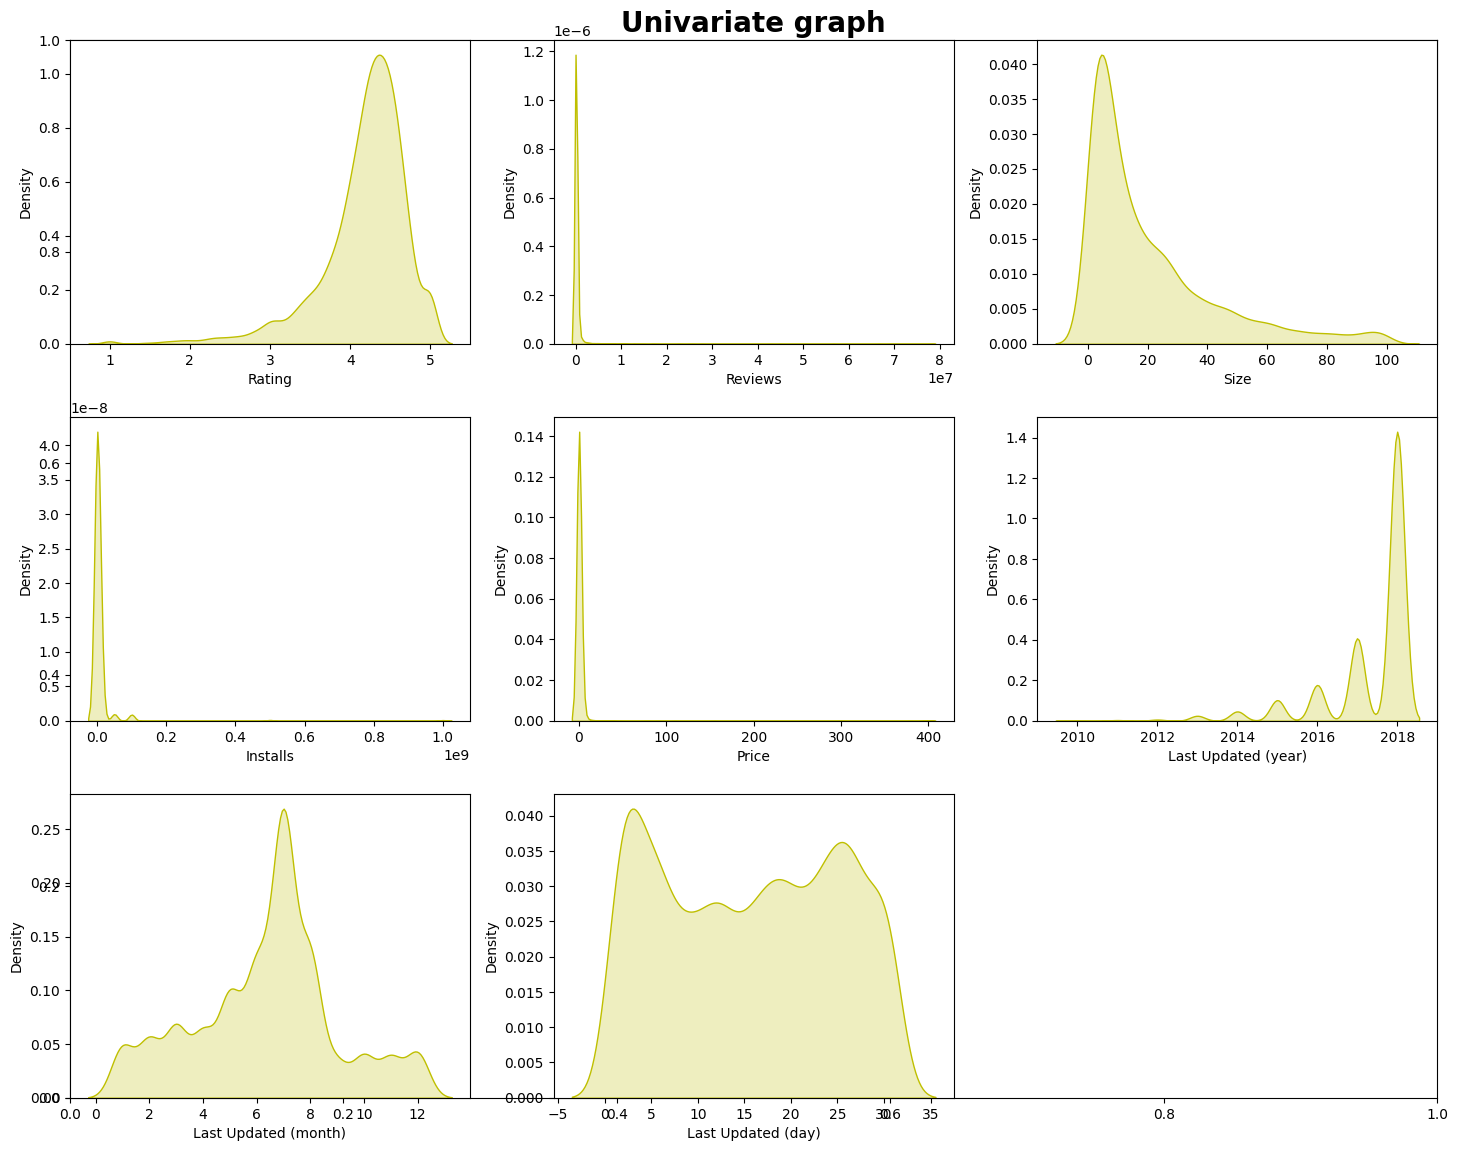

In [119]:
plt.figure(figsize=(15,12))
plt.title("Univariate graph",fontweight='bold',fontsize=20)

for i in range(len(numeric_cols)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data_copy[numeric_cols[i]],color='y',fill=True)

plt.tight_layout()